<a href="https://colab.research.google.com/github/Liza-IITP/Summer_Analytics_IITG-25/blob/main/AgePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score



train = pd.read_csv('Train_Data.csv')
print(train.describe())
print(train.info())
print(train.sample(8))

test = pd.read_csv('Test_Data.csv')

               SEQN     RIAGENDR       PAQ605       BMXBMI       LBXGLU  \
count   1954.000000  1948.000000  1953.000000  1948.000000  1953.000000   
mean   78683.621801     1.510267     1.825397    27.965400    99.491039   
std     2924.115709     0.500023     0.399449     7.327616    16.774665   
min    73564.000000     1.000000     1.000000    14.500000    63.000000   
25%    76194.000000     1.000000     2.000000    22.800000    91.000000   
50%    78717.000000     2.000000     2.000000    26.800000    97.000000   
75%    81217.000000     2.000000     2.000000    31.300000   104.000000   
max    83727.000000     2.000000     7.000000    70.100000   405.000000   

            DIQ010       LBXGLT        LBXIN  
count  1948.000000  1955.000000  1957.000000  
mean      2.015914   115.150384    11.862892  
std       0.187579    46.271615     9.756713  
min       1.000000    40.000000     0.140000  
25%       2.000000    87.000000     5.800000  
50%       2.000000   105.000000     9.0300

In [19]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport
report = ProfileReport(train, title="Pandas Profiling Report", explorative=True)
report.to_file(output_file="report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 46.99it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:

df = train.drop(columns=["SEQN"])

num_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
cat_cols = ['RIAGENDR', 'PAQ605', 'DIQ010', 'age_group']  # include target for later mapping

num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])


cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [21]:

df['RIAGENDR'] = LabelEncoder().fit_transform(df['RIAGENDR'])
df = pd.get_dummies(df, columns=['PAQ605', 'DIQ010'], drop_first=True)

In [22]:

df['age_group'] = df['age_group'].map({'Adult': 0, 'Senior': 1})

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
X = df.drop('age_group', axis=1)
y = df['age_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, class_weight='balanced')  # balances Adult/Senior bias
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       331
           1       0.50      0.13      0.20        63

    accuracy                           0.84       394
   macro avg       0.68      0.55      0.56       394
weighted avg       0.80      0.84      0.80       394

0.8401015228426396
Confusion Matrix:
[[323   8]
 [ 55   8]]
ROC AUC Score: 0.6915


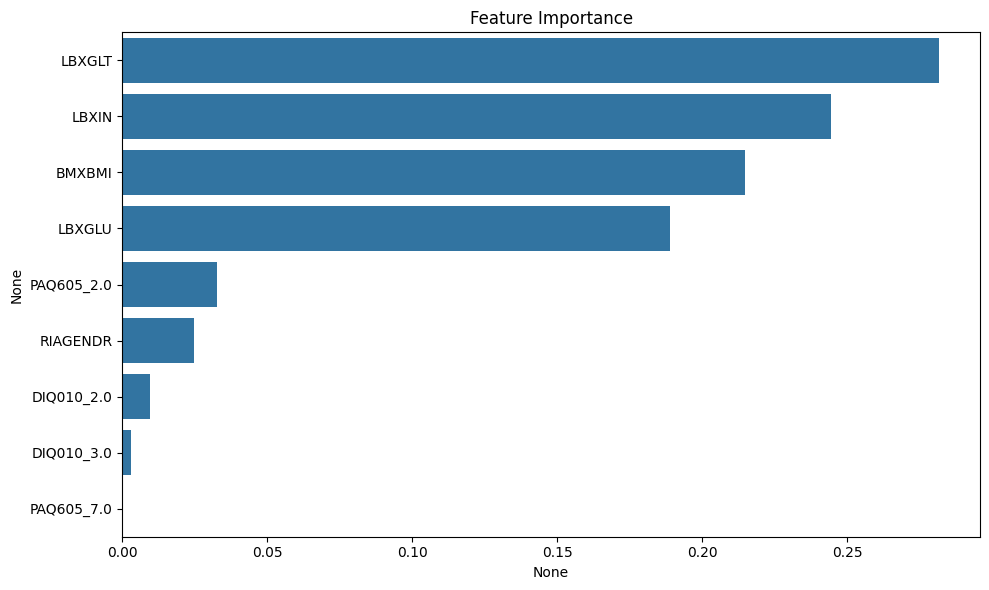

In [23]:

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
